In [1]:
import pandas as pd
import numpy as np

# define the name of the csv file you want to read in
accounts = './data/accounts.csv'
playbacks = './data/playbacks.csv'
subscriptions = './data/subscriptions.csv'

# EDA part

In [2]:
import sql_functions as sf
schema = 'capstone_filmingo'

# One Time Rentals per account

In [59]:
sf.get_dataframe(f'SELECT account_key as account, onetime_rental_count as otr FROM {schema}.accounts ORDER BY otr DESC').head(10)

,account,otr
0,aa298339b2c79e93e2871ecdf517df6c993ae3c557a519...,106
1,42b776449a9d166d06a7f34eda552304d88179fd120243...,79
2,16b4d103c282b05e48cc0c7f6e61ec38849e274cd7113e...,65
3,cef71c8f362d72769a1d6efbcb6893fc2870ca432580f3...,61
4,ee09fd72149823ebdaf43c9dcc26a56ee9df0e65a5f7ff...,57
5,c4bfd142de9f35ca9693f74546f41c1d3b08f8f0935e3a...,53
6,04625fa886f8a78d7448906288532213a7d2fd944e4ddc...,52
7,fe7ad6aadb0c162176d44e930ae89a11bccccc6dfc1d0a...,52
8,67259cdf01114462ed9edcb6ecb645ed90babf871ef156...,51
9,89bdbeafc7bf9171186e733e54209babecbb0586def022...,51


In [117]:
# Sum of accounts -> 22.154
display(sf.get_dataframe(f'SELECT account_key FROM {schema}.accounts').count())

# Sum of otr -> 28.810
display(sf.get_dataframe(f'SELECT SUM(onetime_rental_count) FROM {schema}.accounts'))

# Sum of accounts with otr -> 10.242
display(sf.get_dataframe(f'SELECT account_key FROM {schema}.accounts WHERE onetime_rental_count > 0').count())

# Sum of accounts without otr -> 11.912
display(sf.get_dataframe(f'SELECT account_key FROM {schema}.accounts WHERE onetime_rental_count = 0').count())


account_key    22154
dtype: int64

,sum
0,28810.0


account_key    10242
dtype: int64

account_key    11912
dtype: int64

<AxesSubplot:title={'center':'One Time Rentals per account'}, ylabel='Frequency'>

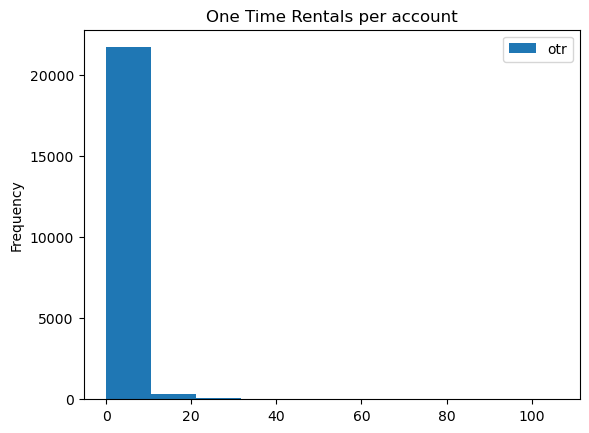

In [60]:
sf.get_dataframe(f'SELECT account_key as account, onetime_rental_count as otr FROM {schema}.accounts ORDER BY otr DESC').plot(kind="hist", title="One Time Rentals per account")

<AxesSubplot:title={'center':'One Time Rentals per account'}>

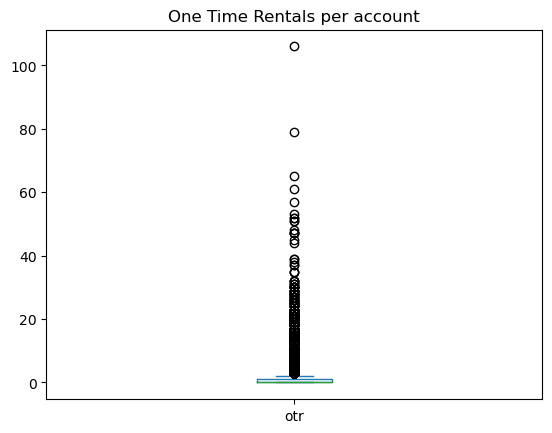

In [47]:
sf.get_dataframe(f'SELECT account_key as account, onetime_rental_count as otr FROM {schema}.accounts ORDER BY otr DESC').plot(kind="box", title="One Time Rentals per account")

<AxesSubplot:title={'center':'One Time Rentals per account'}>

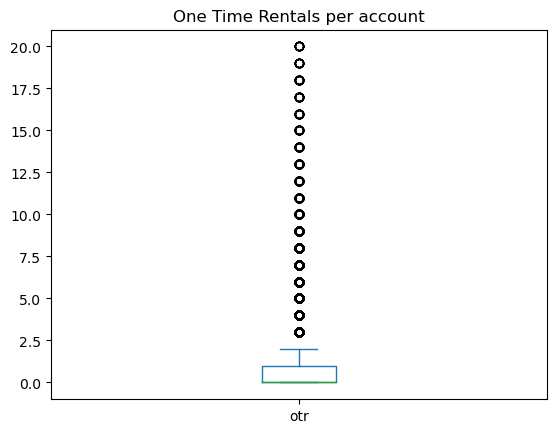

In [57]:
# otr =< 20
sf.get_dataframe(f'SELECT account_key as account, onetime_rental_count as otr FROM {schema}.accounts WHERE onetime_rental_count <= 20 ORDER BY otr DESC').plot(kind="box", title="One Time Rentals per account")

<AxesSubplot:title={'center':'One Time Rentals per account'}, ylabel='Frequency'>

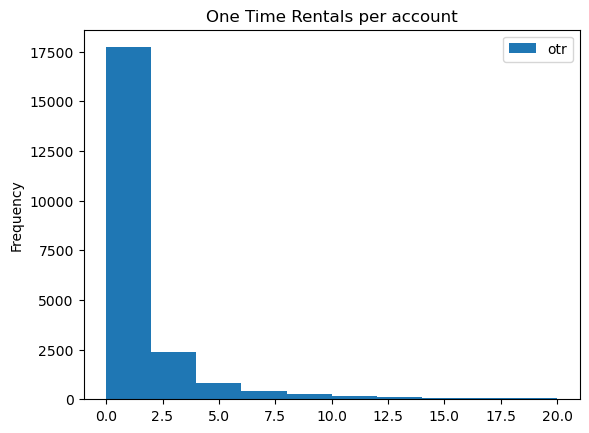

In [58]:
sf.get_dataframe(f'SELECT account_key as account, onetime_rental_count as otr FROM {schema}.accounts WHERE onetime_rental_count <= 20 ORDER BY otr DESC').plot(kind="hist", title="One Time Rentals per account")

# Subscriptions per account

In [22]:
sf.get_dataframe(f' SELECT account_key as account, subscription_count FROM {schema}.accounts ORDER BY subscription_count DESC').head(10)

,account,subscription_count
0,8759014b63622e41a8edd901bfb0103869e1b6ad4f84c0...,13
1,e68bcd0a3a85ea97e852cba9c52f99ccdd357107fd6a90...,12
2,d79211be99d395f2423e42a53a821c77194a550be276f5...,11
3,f3ead1714de04f244091ba535ef5627c91e928827ef7c9...,9
4,1403a526e538b1a2a95bd0893a9d53711e53bb028278ab...,8
5,0ac9ed59984af30673220a6591c0d5a470568297c929c6...,8
6,1af244ebadbaa90e7a2defd77c18039513b9687b9a711d...,8
7,4e1b1c949153de8a36ca7f9406dd3a7e8398d232061a29...,8
8,dca82766503db508e6314cdff4f4e3b376847a8cbcfef6...,8
9,6645ba85f8e055e914a6efd76e44a5ae2934cbc6a032c4...,8


<AxesSubplot:title={'center':'Subscriptions per account'}, ylabel='Frequency'>

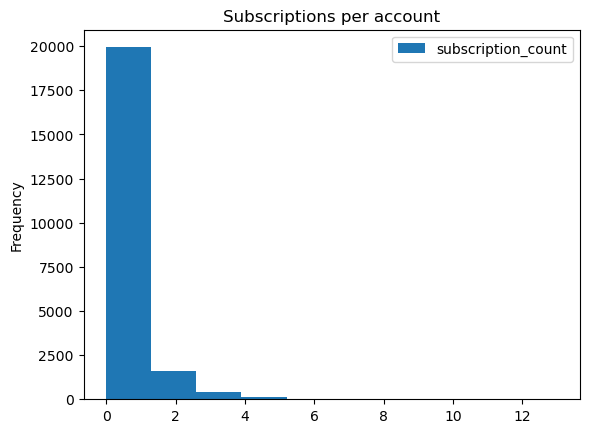

In [102]:
sf.get_dataframe(f' SELECT account_key as account, subscription_count FROM {schema}.accounts ORDER BY subscription_count DESC').plot(kind="hist", title="Subscriptions per account")

<AxesSubplot:title={'center':'Subscriptions per account'}>

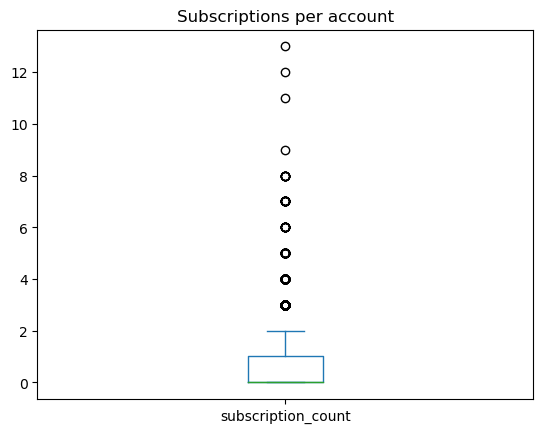

In [65]:
sf.get_dataframe(f' SELECT account_key as account, subscription_count FROM {schema}.accounts ORDER BY subscription_count DESC').plot(kind="box", title="Subscriptions per account")

<AxesSubplot:title={'center':'Subscriptions per account'}, ylabel='Frequency'>

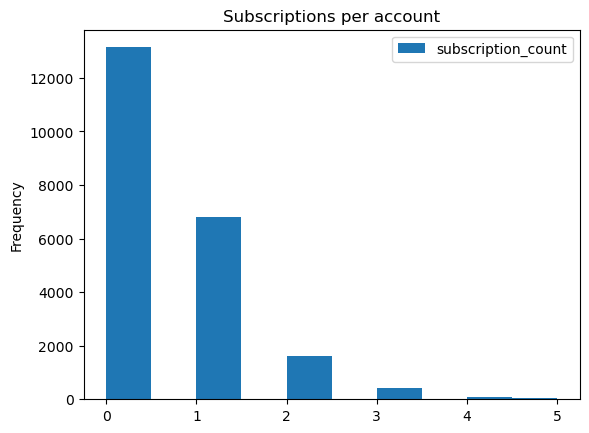

In [64]:
sf.get_dataframe(f' SELECT account_key as account, subscription_count FROM {schema}.accounts WHERE subscription_count <= 5 ORDER BY subscription_count DESC').plot(kind="hist", title="Subscriptions per account")

In [ ]:
# scatter failed
# sf.get_dataframe(f' SELECT account_key as account, subscription_count FROM {schema}.accounts ORDER BY subscription_count DESC').plot.scatter(x="account", y="subscription_count", title="Subscriptions per account")

# OTR of accounts without subscription

<AxesSubplot:title={'center':'One Time Rentals of accounts without sub'}, ylabel='Frequency'>

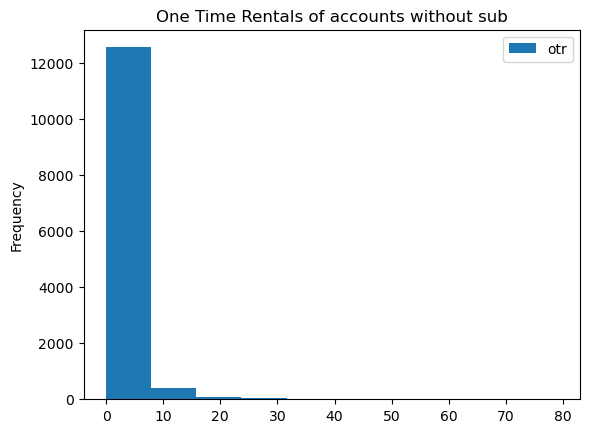

In [68]:
sf.get_dataframe(f'SELECT account_key as account, onetime_rental_count as otr FROM {schema}.accounts WHERE subscription_count = 0 ORDER BY otr DESC').plot(kind="hist", title="One Time Rentals of accounts without sub")

<AxesSubplot:title={'center':'One Time Rentals of accounts without sub'}, ylabel='Frequency'>

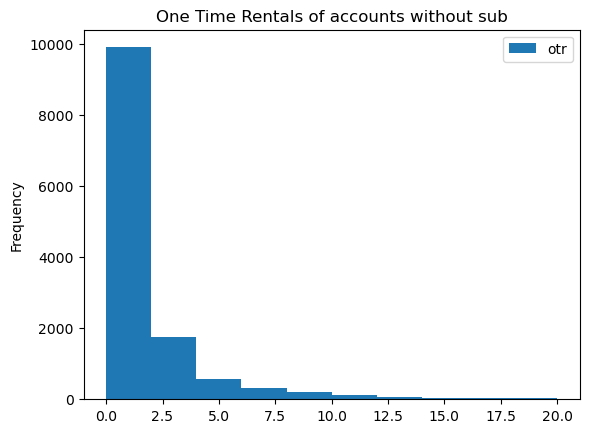

In [104]:
sf.get_dataframe(f'SELECT account_key as account, onetime_rental_count as otr FROM {schema}.accounts WHERE (subscription_count = 0 and onetime_rental_count <= 20) ORDER BY otr DESC').plot(kind="hist", title="One Time Rentals of accounts without sub")

# Accounts without sub AND without otr

In [83]:
nosub_nootr_df = sf.get_dataframe(f'SELECT * FROM {schema}.accounts WHERE (subscription_count = 0 AND onetime_rental_count =0)')
nosub_nootr_df.account_key.count()

5040

In [101]:
nosub_nootr_df.count()

#4960 values voucher_used NaN

account_key             5040
city_original           5033
language                5040
country_code            5039
email_hash              5040
onetime_rental_count    5040
subscription_count      5040
postal_code_clean       5040
city_clean              3889
state                   3889
language_code           2984
country_name            5038
region                  5038
sub_region              5038
voucher_used              85
dtype: int64

# Total playbacks per year

In [24]:
sf.get_dataframe(f'SELECT EXTRACT(year FROM date_start) as year, account_key as account, count(*) as playbacks FROM {schema}.playbacks GROUP BY account, EXTRACT(year FROM date_start)').head(15)

,year,account,playbacks
0,2021.0,fc80bc77fae4e313b95eba3c416b5be51693f824e8cda5...,1
1,2020.0,49af49f5cdbc08cca082318f55a01020b5bf8e71bfed7e...,2
2,2020.0,da971c64fb4ccc015562372b6d48c0b6c28877616ca92e...,9
3,2020.0,effdccc671dcd2fe6e94e0f526a01c2b94a242ab33822e...,5
4,2022.0,6d1d5dbd3ab80281aaafb1899776a0be92d6c657692545...,8
5,2021.0,f764485b3791c2293103febdc436ebf647b71e1a85d172...,40
6,2020.0,d90f1c672cc16de692b7c489a35f4a33b3f892322e096d...,2
7,2021.0,1c68fecd95389f79141e3bc4a9784b5e80481f98880a22...,5
8,2021.0,dd22776544a1eb06f83c99edf3184dc7a57aa5d5c4f36b...,6
9,2021.0,5390d849c25d7befd3be566d31628fcd3baff552f1725f...,5


In [37]:
sf.get_dataframe(f"SELECT account_key as account, count(*) as playbacks FROM {schema}.playbacks WHERE date_start BETWEEN '01-10-2020' and '01-10-2021' GROUP BY account").head(15)

,account,playbacks
0,de49489fa053e641358832f3828c51d4caacd4b5bce4fa...,1
1,408242031892d461f1f3c487e5c8ccc9b3f89b7ed66a6f...,1
2,e3115a13e7669baba96076f8d1a2b164334aea99ef1819...,1
3,9d417f54b0e5d43b32614c1e049abb751aafc1c5e0ac77...,3
4,484ab44828d615bef381035ff9501bb5f4ea97343ee35d...,5
5,5e40fb03ed1bbcf37703c64e106100735f5df7a40f1c44...,3
6,050917ccf8145b58bba593198705ff7798e4b21baee029...,2
7,c8f1275b3efabce9b339b3dcc31323a1a5e8c8af820eaa...,1
8,725e1a6527ab0c731c3097da3439f1522b56353190f87b...,14
9,e5f9d393069001ac1ea9fbc764a391502e247a903fd7c7...,2


In [156]:
sf.get_dataframe(f'SELECT EXTRACT(year FROM date_start) as year, count(*) as playbacks FROM {schema}.playbacks GROUP BY EXTRACT(year FROM date_start) ORDER BY year').head(15)
#TODO average per month per year
#IDEA to have two time periods (October 20-21-22)

,year,playbacks
0,2020.0,18928
1,2021.0,80727
2,2022.0,39914


# Playbacks per device

In [107]:
sf.get_dataframe(f' SELECT device, COUNT(*) as playbacks FROM {schema}.playbacks GROUP BY device').head()

,device,playbacks
0,desktop,116769
1,mobile,22800


In [93]:
sf.get_dataframe(f' SELECT app_user, COUNT(*) FROM {schema}.playbacks GROUP BY app_user').head()

,app_user,count
0,no,126396
1,yes,13173


In [94]:
sf.get_dataframe(f' SELECT device, app_user, COUNT(*) FROM {schema}.playbacks GROUP BY device, app_user').head()

#TODO rethink the categorizat names (What about tv app user)

,device,app_user,count
0,desktop,no,116769
1,mobile,no,9627
2,mobile,yes,13173


In [ ]:
#TODO Ugh not working rn
sf.get_dataframe(f" SELECT user_agent, COUNT(*) FROM {schema}.playbacks WHERE user_agent LIKE '%%iPhone%%'").head()


# Playbacks per subscription type (per month)

In [125]:
#sf.get_dataframe(f' SELECT device, COUNT(*) as playbacks FROM {schema}.playbacks GROUP BY device').head()
sf.get_dataframe(f' SELECT subscription_type, COUNT(*) as playbacks FROM {schema}.playbacks INNER JOIN {schema}.subscriptions on {schema}.playbacks.subscription_key = {schema}.subscriptions.subscription_key GROUP BY subscription_type').head()
#TODO average per subscription per type -> playbacks/count(subscription) -> view per subscription

,subscription_type,playbacks
0,BASIC,48604
1,PATRON,41737
2,STANDARD,49228


# Playbacks per month/weekday 

In [134]:
sf.get_dataframe(f' SELECT EXTRACT(year FROM date_start) as year, subscription_type, COUNT(*) as playbacks FROM {schema}.playbacks INNER JOIN {schema}.subscriptions on {schema}.playbacks.subscription_key = {schema}.subscriptions.subscription_key GROUP BY subscription_type, year ORDER BY subscription_type').head(30)
sf.get_dataframe(f' SELECT EXTRACT(year FROM date_start) as year, subscription_type, COUNT(*) as playbacks FROM {schema}.playbacks INNER JOIN {schema}.subscriptions on {schema}.playbacks.subscription_key = {schema}.subscriptions.subscription_key GROUP BY subscription_type, year ORDER BY subscription_type').head(30)
#TODO per month and weekday
#TODO transform year into timeframe -> WHERE DATE BETWEEN

,year,subscription_type,playbacks
0,2020.0,BASIC,5565
1,2021.0,BASIC,27888
2,2022.0,BASIC,15151
3,2020.0,PATRON,5009
4,2021.0,PATRON,24168
5,2022.0,PATRON,12560
6,2020.0,STANDARD,8354
7,2021.0,STANDARD,28671
8,2022.0,STANDARD,12203


In [137]:
sf.get_dataframe(f' SELECT EXTRACT(year FROM date_start) as year, EXTRACT(month FROM date_start) as month, subscription_type, COUNT(*) as playbacks FROM {schema}.playbacks INNER JOIN {schema}.subscriptions on {schema}.playbacks.subscription_key = {schema}.subscriptions.subscription_key GROUP BY subscription_type, year, month ORDER BY year, month').head(30)

,year,month,subscription_type,playbacks
0,2020.0,10.0,BASIC,884
1,2020.0,10.0,PATRON,627
2,2020.0,10.0,STANDARD,909
3,2020.0,11.0,BASIC,2232
4,2020.0,11.0,PATRON,2032
5,2020.0,11.0,STANDARD,4108
6,2020.0,12.0,BASIC,2449
7,2020.0,12.0,PATRON,2350
8,2020.0,12.0,STANDARD,3337
9,2021.0,1.0,BASIC,3234


# Playbacks per account (per month)

In [167]:
sf.get_dataframe(f' SELECT EXTRACT(year FROM date_start) as year, EXTRACT(month FROM date_start) as month, playbacks.account_key as account, COUNT(*) as playbacks FROM {schema}.playbacks INNER JOIN {schema}.accounts on {schema}.playbacks.account_key = {schema}.accounts.account_key GROUP BY playbacks.account_key, year, month ORDER BY year, month').head()
#TODO average per month per account
#TODO COUNT of playbacks per subscription_type
#TODO playback as x-axis bar chart

,year,month,account,playbacks
0,2020.0,10.0,00b3ca364f49f801f257e1e6dff4810cbefb34b3ff4780...,2
1,2020.0,10.0,00c7287a5449e9b4071da68e49053a507676e09b8a15ee...,1
2,2020.0,10.0,00ed08533436943cbe509eb354af609105ab88a65aec0c...,3
3,2020.0,10.0,0113a563f7147636f69eb112b0a8b04dac44259e78818f...,2
4,2020.0,10.0,012d4f225b098eca174635e86f9070673cf324b8eb5bd8...,3


# Hours watched per account (per month)

In [170]:
sf.get_dataframe(f' SELECT EXTRACT(year FROM date_start) as year, EXTRACT(month FROM date_start) as month, playbacks.account_key as account, (SUM(playback_time)/60/60) as playback_hours FROM {schema}.playbacks INNER JOIN {schema}.accounts on {schema}.playbacks.account_key = {schema}.accounts.account_key GROUP BY playbacks.account_key, year, month ORDER BY year, month').head(30)
sf.get_dataframe(f' SELECT EXTRACT(year FROM date_start) as year, EXTRACT(month FROM date_start) as month, (SUM(playback_time)/60/60) as playback_hours FROM {schema}.playbacks INNER JOIN {schema}.accounts on {schema}.playbacks.account_key = {schema}.accounts.account_key GROUP BY year, month ORDER BY year, month').mean()
#TODO average per account

year               2021.250000
month                 6.500000
playback_hours    10407.222222
dtype: float64

# Sent movie vouchers
How many movie vouchers are being gifted per month / per subscription type?

In [40]:
sf.get_dataframe(f' SELECT DISTINCT * FROM {schema}.playbacks WHERE device IS NULL')

,playback_ID,subscription_key,account_key,movie_id,date_start,playback_time,user_agent,ip_hash,device,app user
